## Exploring new ways to represent data to the model

### Get the simplified notes array and raw audio

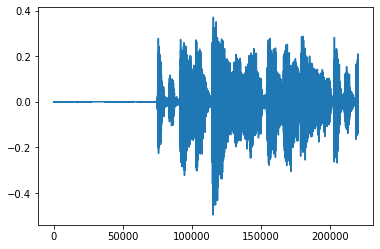

In [2]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path.cwd().parent))
from tensor_hero.preprocessing.chart import chart2tensor
from tensor_hero.preprocessing.data import __remove_modifiers, __remove_release_keys
from tensor_hero.preprocessing.audio import compute_mel_spectrogram
import numpy as np
import librosa
import matplotlib.pyplot as plt

parent_data_path = Path.cwd().parent / 'Training_Data' / 'fully_curated' / 'full_curated'
song_dirs = [parent_data_path / x for x in os.listdir(parent_data_path)]
chart_paths = [x / 'notes.chart' for x in song_dirs]
audio_paths = [x / 'other.wav' for x in song_dirs]
spec = compute_mel_spectrogram(audio_paths[0])

# Get the simplified notes array
notes_array = chart2tensor(chart_paths[0])
notes_array = __remove_modifiers(__remove_release_keys(notes_array))

data, sr = librosa.load(str(audio_paths[0]))  # waveform, sample rate (samples/second)
plt.plot(data[:(sr*10)])  # First 10 seconds of audio data

In [3]:
# Compute spectrogram the exact way they did it in Hawthorne et al
print(np.where(notes_array > 0))

(array([  346,   381,   415, ..., 34202, 34237, 34271]),)
